<a href="https://colab.research.google.com/github/anna-victoria/qualificacao-data-analytics-machine-learing/blob/main/Aula13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regressão Logística

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
sns.set_style()


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/victor-ferreira/dataset/main/heart-disease-clean.csv")

print("Tamanho do dataframe: {}\n".format(df.shape))
df.head()


Tamanho do dataframe: (303, 14)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
#bibliotecas necessárias

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


In [ ]:
#importar a biblioteca a ser utilizada para o modelo
from sklearn.linear_model import LogisticRegression

#instaciar e escolher os hiperparametros
model = LogisticRegression()

#separar os dados em treino e teste
X = df.drop('num', axis=1)
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y)

#padronizar os dados de treino
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

#realizar o treinamento do modelo
model.fit(X_train, y_train)

#Fazer as previsões em cima dos novos dados
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
#relatório de classificação

              precision    recall  f1-score   support

           0       0.68      0.88      0.77        34
           1       0.88      0.67      0.76        42

    accuracy                           0.76        76
   macro avg       0.78      0.77      0.76        76
weighted avg       0.79      0.76      0.76        76



quando mais prox de 1 na precisão melhor, só que ele não pode chegar à 1 senão atinge um overfit.
0 = não problemas cardiacos
ele consegue indentificar com 85% de precisão, um recall de 88%, um f1-score de 77% e um suporte de 34%
1 = tem problemas cardiados.
ele consegue indentificar com 88% de precisão, um recall de 67%, um f1-score de 76% e um suporte de 42%.

A acuracia é de 76%

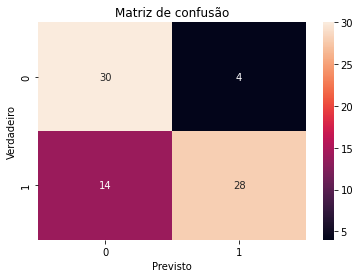

In [ ]:
#matriz de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

In [ ]:
#probabilidades em cima do dataset de teste
y_prob = model.predict_proba(X_test)

print("y_pred: \n", y_pred[0:5])
print("\n y_proba: \n", y_prob[0:5])

y_pred: 
 [0 0 1 0 0]

 y_proba: 
 [[0.86788545 0.13211455]
 [0.53964846 0.46035154]
 [0.02504749 0.97495251]
 [0.76841238 0.23158762]
 [0.90419639 0.09580361]]


 numero verdadeiro
 [CHANCE DE 0, CHANCE DE 1]
* 0  [0.86788545 0.13211455]
* 0  [0.53964846 0.46035154]
* 1 [0.02504749 0.97495251] 
* 0 [0.76841238 0.23158762]
* 0 [0.90419639 0.09580361]